In [1]:
import numpy as np
import tensorflow as tf

In [6]:
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

## create tensorflow structure start##
weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))
y = weights * x_data + biases

# create loss and optimizer
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)

train = optimizer.minimize(loss)
## create tensorflow structure end##

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if(step % 20 == 0):
            print(step, sess.run(weights), sess.run(biases))

0 [ 0.73034257] [-0.10032479]
20 [ 0.28221366] [ 0.19555578]
40 [ 0.15130268] [ 0.27059349]
60 [ 0.11444438] [ 0.29172054]
80 [ 0.10406685] [ 0.2976689]
100 [ 0.10114505] [ 0.29934368]
120 [ 0.1003224] [ 0.29981521]
140 [ 0.10009078] [ 0.29994798]
160 [ 0.10002557] [ 0.29998535]
180 [ 0.10000723] [ 0.29999587]
200 [ 0.10000204] [ 0.29999885]


### Session Tutorial

In [10]:
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],
                       [2]])
product = tf.matmul(matrix1, matrix2)
with tf.Session() as sess:
    print(sess.run(product))

[[12]]


### Variable Tutorial

In [23]:
state = tf.Variable(0, name='counter')
# print(state.name)

# 1.0 之前版本不支持new_value = state + 1格式
one = tf.constant(1)
new_value = tf.add(state, one)
# assign方法将第二个参数的值分配给第一个参数，此时state与new_value的值相等
update = tf.assign(state, new_value)

# 1.0 之后版本支持变量直接加常量的操作
# new_value = state + 1
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print('Before update: state = ', sess.run(state))    # 更新前
    for _ in range(3):
        sess.run(update)
        print('After update ', _ + 1, ': state = ', sess.run(state))    # 更新后

Before update: state =  0
After update  1 : state =  1
After update  2 : state =  2
After update  3 : state =  3


### placeholder Tutorial

#### 使用`placehodler`给tensor传入变量，应在tf.Session().run()中通过`feed_dict`传入，传入类型必须与placehodler中声明类型一致

In [32]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: 7., input2: 8.}))

56.0


### Nerual Network

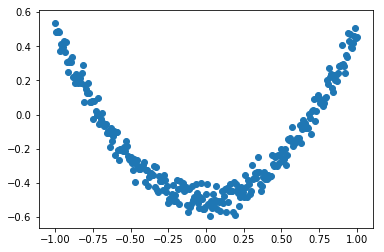

In [60]:
import numpy as np
import matplotlib.pyplot as plt
# 定义一个神经层
def add_layer(inputs, in_size, out_size, activation_function=None):
    # random_normal初始化的值服从正态分布
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs
    
# 自己生成数据
# numpy.linspace在指定的间隔内返回均匀间隔的数字
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

layer_1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(layer_1, 10, 1, activation_function=None)

# tf.reduce_sum中的axis参数,传入的是求和的维度,如果为0则为第一维度求和(去掉1层[]求和),如果为1则为第二维度求和(去掉2层[]求和),如果为None则将所有元素求和
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), axis=1))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    # 绘制样本
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
#         测试axis
#         if(i == 0):
#             print('axis=0: ', sess.run(tf.reduce_sum(tf.square(ys - prediction), axis=0), feed_dict={xs: x_data, ys: y_data}))
#             print('axis=1: ', sess.run(tf.reduce_sum(tf.square(ys - prediction), axis=1), feed_dict={xs: x_data, ys: y_data}))
#             print('axis=None: ', sess.run(tf.reduce_sum(tf.square(ys - prediction), axis=None), feed_dict={xs: x_data, ys: y_data}))
        if(i % 50 == 0):
#             print('loss: ', sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
            # 在jupyter notebook中不能实现动态图像,需要在shell中运行
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)